In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sds = pd.read_csv('../data/SDS_1_678.csv')

In [3]:
sds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   episode_name     678 non-null    object
 1   length_episode   678 non-null    object
 2   context_episode  678 non-null    object
 3   guest_name       678 non-null    object
 4   guest_info       678 non-null    object
 5   text_episode     676 non-null    object
dtypes: object(6)
memory usage: 31.9+ KB


In [4]:
sds['episode_number'] = sds['episode_name'].str.split(':', expand = True)[0]
sds['episode_name'] = sds['episode_name'].str.split(':', expand = True)[1]
sds['guest_name'] = sds['guest_name'].str.split(':', expand = True)[1]
sds['length_episode'] = sds['length_episode'].str.split(' ', expand = True)[0]
sds['episode_number'] = sds['episode_number'].str.replace('SDS', '')

In [5]:
sds

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number
0,How to Avoid Failing at Digital Transformation,60,BusinessData Science,"Tony SaldanhaWednesday Jul 08, 2020","Subscribe on Website, Apple Podcasts, Spotify,...","Kirill Eremenko:\tThis is episode number 381, ...",381
1,Discovering Data Science workflows and the im...,62,Machine LearningData SciencePython,"Daniel WhitenackThursday Jun 15, 2017","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 61 with data s...,061
2,Great tips on building a successful Analytics...,65,BusinessDatabase,"Jim HadleyThursday May 04, 2017","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 49 with Founde...,049
3,"AI in Recruitment, Machine Learning, and wher...",66,BusinessMachine LearningData ScienceArtificial...,"Ben TaylorFriday Feb 24, 2017","Subscribe on Website, Apple Podcasts, Spotify,...","Kirill:\tThis is episode number 29, with Chief...",029
4,Two Wolves,6,Data Science,"Kirill EremenkoFriday Apr 19, 2019","Subscribe on Website, Apple Podcasts, Spotify,...","This is FiveMinuteFriday, episode number 254, ...",254
...,...,...,...,...,...,...,...
673,True Personalization Through Reinforcement Le...,61,Machine LearningData ScienceArtificial Intelli...,"Peyman HesamiWednesday Sep 04, 2019","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode 293 with Dat...,293
674,Becoming Seasoned At Failure,69,BusinessData Science,"Michelle KeimWednesday Sep 25, 2019","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is Episode Number 299 w...,299
675,Making the Public Graphically Literate,65,Data ScienceData Visualization,"Alberto CairoWednesday Jun 19, 2019","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode number 271 w...,271
676,"Intuition, Frameworks, and Unlocking the Powe...",58,BusinessData Science,"Piyanka JainWednesday May 06, 2020","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode number 363 w...,363


In [6]:
sds['episode_number'] = sds['episode_number'].astype('int')
sds['length_episode'] = sds['length_episode'].astype('int')

In [7]:
sds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   episode_name     678 non-null    object
 1   length_episode   678 non-null    int64 
 2   context_episode  678 non-null    object
 3   guest_name       678 non-null    object
 4   guest_info       678 non-null    object
 5   text_episode     676 non-null    object
 6   episode_number   678 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 37.2+ KB


In [8]:
sds[sds['length_episode'] <= 20]

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number
4,Two Wolves,6,Data Science,"Kirill EremenkoFriday Apr 19, 2019","Subscribe on Website, Apple Podcasts, Spotify,...","This is FiveMinuteFriday, episode number 254, ...",254
6,How do Lobsters Grow?,5,Data Science,"Kirill EremenkoSaturday Feb 24, 2018","Subscribe on Website, Apple Podcasts, Spotify,...",This is Five Minute Friday episode number 134:...,134
7,Wheel of Life,9,Data Science,"Kirill EremenkoFriday Nov 20, 2020","Subscribe on Website, Apple Podcasts, Spotify,...","(00:04):\nThis is FiveMinuteFriday, Wheel of L...",420
9,The Best Time to Plant a Tree,4,Data Science,"Jon KrohnThursday Apr 14, 2022","Subscribe on Website, Apple Podcasts, Spotify,...",(00:05):\nThis is Five-Minute Friday on The Be...,566
10,Artificial General Intelligence is Not Nigh,6,Data ScienceArtificial Intelligence,"Jon KrohnThursday Jun 30, 2022","Subscribe on Website, Apple Podcasts, Spotify,...",(00:06):\nThis is Five-Minute Friday with Part...,588
...,...,...,...,...,...,...,...
661,How to get a job in Data Science,8,Data Science,"Kirill EremenkoFriday Mar 24, 2017","Subscribe on Website, Apple Podcasts, Spotify,...",This is Five Minute Friday episode number 38: ...,38
664,Communicate Your Needs,7,Data Science,"Kirill EremenkoFriday Oct 16, 2020","Subscribe on Website, Apple Podcasts, Spotify,...","(00:04):\nThis is FiveMinuteFriday, Communicat...",410
670,Think Bigger,6,Data Science,"Kirill EremenkoFriday Sep 11, 2020","Subscribe on Website, Apple Podcasts, Spotify,...","(00:05):\nThis is FiveMinuteFriday, episode nu...",400
672,Failure,6,Data Science,"Kirill EremenkoFriday Mar 10, 2017","Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is Five Minute Friday episode nu...,34


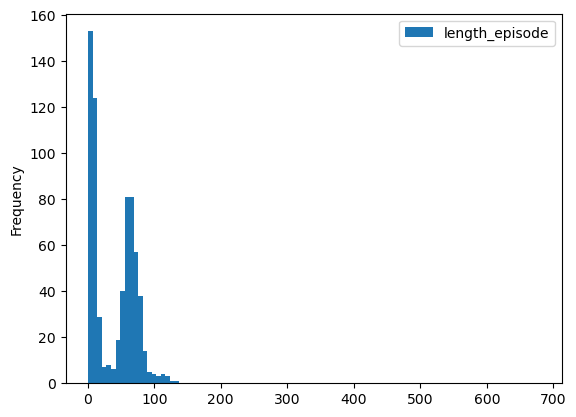

In [9]:
sds.plot.hist(column = ['length_episode'], bins = 100);

In [10]:
sds['episode_date'] = sds['guest_name'].str.extract(r'(\b[A-Za-z]{3}\s\d{2},\s\d{4}\b)', expand = False).str.strip()

In [11]:
sds['guest_name'] = sds['guest_name'].str.replace(r'(\b[A-Za-z]{3}\s\d{2},\s\d{4}\b)', '')

/var/folders/s3/9_r9v9px7_v0q69b5zcbnmsm0000gn/T/ipykernel_6908/3818836468.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sds['guest_name'] = sds['guest_name'].str.replace(r'(\b[A-Za-z]{3}\s\d{2},\s\d{4}\b)', '')


In [12]:
sds["episode_guest"] = sds['guest_name'].str.extract(r'(\b[A-Z][a-z]+\s[A-Z][a-z]+)', expand = False).str.strip()

In [13]:
sds["episode_day"] = sds['guest_name'].str.replace(r'(\b[A-Z][a-z]+\s[A-Z][a-z]+)', '')

/var/folders/s3/9_r9v9px7_v0q69b5zcbnmsm0000gn/T/ipykernel_6908/2649959677.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sds["episode_day"] = sds['guest_name'].str.replace(r'(\b[A-Z][a-z]+\s[A-Z][a-z]+)', '')


In [14]:
sds["episode_guest"].value_counts()

Kirill Eremenko       194
Jon Krohn             105
Ben Taylor              8
Dan Shiebler            4
Sinan Ozdemir           4
                     ... 
Deborah Berebichez      1
Paul Brown              1
Kian Katanforoosh       1
Tracy Crossley          1
Piyanka Jain            1
Name: episode_guest, Length: 305, dtype: int64

In [15]:
sds

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_guest,episode_day
0,How to Avoid Failing at Digital Transformation,60,BusinessData Science,Tony SaldanhaWednesday,"Subscribe on Website, Apple Podcasts, Spotify,...","Kirill Eremenko:\tThis is episode number 381, ...",381,"Jul 08, 2020",Tony Saldanha,Wednesday
1,Discovering Data Science workflows and the im...,62,Machine LearningData SciencePython,Daniel WhitenackThursday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 61 with data s...,61,"Jun 15, 2017",Daniel Whitenack,Thursday
2,Great tips on building a successful Analytics...,65,BusinessDatabase,Jim HadleyThursday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 49 with Founde...,49,"May 04, 2017",Jim Hadley,Thursday
3,"AI in Recruitment, Machine Learning, and wher...",66,BusinessMachine LearningData ScienceArtificial...,Ben TaylorFriday,"Subscribe on Website, Apple Podcasts, Spotify,...","Kirill:\tThis is episode number 29, with Chief...",29,"Feb 24, 2017",Ben Taylor,Friday
4,Two Wolves,6,Data Science,Kirill EremenkoFriday,"Subscribe on Website, Apple Podcasts, Spotify,...","This is FiveMinuteFriday, episode number 254, ...",254,"Apr 19, 2019",Kirill Eremenko,Friday
...,...,...,...,...,...,...,...,...,...,...
673,True Personalization Through Reinforcement Le...,61,Machine LearningData ScienceArtificial Intelli...,Peyman HesamiWednesday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode 293 with Dat...,293,"Sep 04, 2019",Peyman Hesami,Wednesday
674,Becoming Seasoned At Failure,69,BusinessData Science,Michelle KeimWednesday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is Episode Number 299 w...,299,"Sep 25, 2019",Michelle Keim,Wednesday
675,Making the Public Graphically Literate,65,Data ScienceData Visualization,Alberto CairoWednesday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode number 271 w...,271,"Jun 19, 2019",Alberto Cairo,Wednesday
676,"Intuition, Frameworks, and Unlocking the Powe...",58,BusinessData Science,Piyanka JainWednesday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode number 363 w...,363,"May 06, 2020",Piyanka Jain,Wednesday


In [16]:
sds['text_episode'].loc[2]

"Kirill:\tThis is episode number 49 with Founder of Tiber Solutions, Jim Hadley.(background music plays)Welcome to the SuperDataScience podcast. My name is Kirill Eremenko, data science coach and lifestyle entrepreneur. And each week we bring you inspiring people and ideas to help you build your successful career in data science. Thanks for being here today and now let’s make the complex simple.(background music plays)Hello everybody and welcome to the SuperDataScience podcast. Super excited to have you on the show, and today we've got an exciting guest, Jim Hadley, who is the President and Founder of Tiber Solutions. Now Tiber Solutions is a consulting firm specialising in analytics consulting. And today's podcast is going to be very different to what we're normally used to. So normally we have quite a lot of technical stuff on the podcast, so we talk about some tools and techniques and methodologies. And also we sometimes talk about how people build their careers, or how people have 

In [17]:
sds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   episode_name     678 non-null    object
 1   length_episode   678 non-null    int64 
 2   context_episode  678 non-null    object
 3   guest_name       678 non-null    object
 4   guest_info       678 non-null    object
 5   text_episode     676 non-null    object
 6   episode_number   678 non-null    int64 
 7   episode_date     678 non-null    object
 8   episode_guest    639 non-null    object
 9   episode_day      678 non-null    object
dtypes: int64(2), object(8)
memory usage: 53.1+ KB


In [18]:
sds['episode_day'].unique()

array([' Wednesday ', ' Thursday ', ' Friday ', ' Saturday ',
       ' Kirill and HadelinFriday ', ' CollThursday ', ' Tuesday ',
       '  NelsonFriday ', ' Kirill and MitjaFriday ', '  Friday ',
       '  AnticFriday ', ' Kirill, Hadelin and MarcFriday ',
       ' Kirill and MarcFriday ', ' éWednesday ', ' DJ PatilWednesday ',
       ' Kirill, Vitaly and HadelinFriday ', ' . LawrenceTuesday ',
       '  and Hadelin de PontevesTuesday ', ' KnightThursday ',
       ' Nicole BüttnerTuesday ', ' Kirill and AnthonyFriday ',
       ' Leigh and Wednesday ', '  Wednesday ', ' Monday ',
       '  KingWednesday ', ' ísFriday ', ' Hadelin de PontevesWednesday ',
       " Brian T. O'NeillFriday ", '  RoyalWednesday ',
       ' -FrancoisTuesday ', ' Hadelin de PontevesMonday ',
       ' KinneyTuesday ', ' -AddisonTuesday ', ' Ann K. EmeryTuesday ',
       ' Vincent D. WarmerdamTuesday ', '  and Wednesday ',
       ' DellTuesday ', ' T. Wednesday ', ' Sunday ',
       ' Kirill and HadelinMonday ',

In [19]:
sds['last_name'] = sds['guest_name'].str.split(' ').str[-2]

In [21]:
sds['last_name'].unique()

array(['SaldanhaWednesday', 'WhitenackThursday', 'HadleyThursday',
       'TaylorFriday', 'EremenkoFriday', 'EremenkoSaturday',
       'DoweThursday', 'KrohnThursday', 'BareFriday', 'HadelinFriday',
       'KrohnFriday', 'McCollThursday', 'CoreyThursday',
       'RosenquistWednesday', 'TranTuesday', 'HadjioannouWednesday',
       'NelsonFriday', 'MiikkulainenThursday', 'FazzariThursday',
       'BishopWednesday', 'MeloonWednesday', 'KarimFriday',
       'MasonTuesday', 'JohnsonWednesday', 'VladimirovWednesday',
       'BernhardssonTuesday', 'SkeetWednesday', 'KriebelWednesday',
       'AkkirajuWednesday', 'ShectmanWednesday', 'EremenkoTuesday',
       'HopkinsThursday', 'SarfatiWednesday', 'TaylorWednesday',
       'LobelThursday', 'KrohnWednesday', 'MitjaFriday',
       'SosulskiThursday', 'HodsonTuesday', 'BarousseTuesday',
       'OdubelaWednesday', 'MoroneyWednesday', 'HarrisFriday',
       'PeachWednesday', 'GonulerTuesday', 'GrauerTuesday',
       'HuangThursday', 'CaseyWednesday

In [20]:
sds

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_guest,episode_day,last_name
0,How to Avoid Failing at Digital Transformation,60,BusinessData Science,Tony SaldanhaWednesday,"Subscribe on Website, Apple Podcasts, Spotify,...","Kirill Eremenko:\tThis is episode number 381, ...",381,"Jul 08, 2020",Tony Saldanha,Wednesday,SaldanhaWednesday
1,Discovering Data Science workflows and the im...,62,Machine LearningData SciencePython,Daniel WhitenackThursday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 61 with data s...,61,"Jun 15, 2017",Daniel Whitenack,Thursday,WhitenackThursday
2,Great tips on building a successful Analytics...,65,BusinessDatabase,Jim HadleyThursday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill:\tThis is episode number 49 with Founde...,49,"May 04, 2017",Jim Hadley,Thursday,HadleyThursday
3,"AI in Recruitment, Machine Learning, and wher...",66,BusinessMachine LearningData ScienceArtificial...,Ben TaylorFriday,"Subscribe on Website, Apple Podcasts, Spotify,...","Kirill:\tThis is episode number 29, with Chief...",29,"Feb 24, 2017",Ben Taylor,Friday,TaylorFriday
4,Two Wolves,6,Data Science,Kirill EremenkoFriday,"Subscribe on Website, Apple Podcasts, Spotify,...","This is FiveMinuteFriday, episode number 254, ...",254,"Apr 19, 2019",Kirill Eremenko,Friday,EremenkoFriday
...,...,...,...,...,...,...,...,...,...,...,...
673,True Personalization Through Reinforcement Le...,61,Machine LearningData ScienceArtificial Intelli...,Peyman HesamiWednesday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode 293 with Dat...,293,"Sep 04, 2019",Peyman Hesami,Wednesday,HesamiWednesday
674,Becoming Seasoned At Failure,69,BusinessData Science,Michelle KeimWednesday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is Episode Number 299 w...,299,"Sep 25, 2019",Michelle Keim,Wednesday,KeimWednesday
675,Making the Public Graphically Literate,65,Data ScienceData Visualization,Alberto CairoWednesday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode number 271 w...,271,"Jun 19, 2019",Alberto Cairo,Wednesday,CairoWednesday
676,"Intuition, Frameworks, and Unlocking the Powe...",58,BusinessData Science,Piyanka JainWednesday,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill Eremenko:\tThis is episode number 363 w...,363,"May 06, 2020",Piyanka Jain,Wednesday,JainWednesday


In [ ]:
sds[sds['episode_day'] == 'Friday']

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
sds['guest_info'].loc[10]

In [ ]:
sds

In [ ]:
plt.hist(sds['length_episode']);

In [ ]:
sds.columns

In [ ]:
sds['length_episode'].value_counts().head(10)

In [ ]:
sds['context_episode'].unique()